In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/TCS.csv')

Exploratory Data Analysis


In [3]:
#Dimention of dataset
df.shape

(4139, 15)

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [5]:
#checking for null values and the types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4139 non-null   object 
 1   Symbol              4139 non-null   object 
 2   Series              4139 non-null   object 
 3   Prev Close          4139 non-null   float64
 4   Open                4139 non-null   float64
 5   High                4139 non-null   float64
 6   Low                 4139 non-null   float64
 7   Last                4139 non-null   float64
 8   Close               4139 non-null   float64
 9   VWAP                4139 non-null   float64
 10  Volume              4139 non-null   int64  
 11  Turnover            4139 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4139 non-null   int64  
 14  %Deliverble         4139 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 485.2

In [6]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,2456.000000,4.139000e+03,4139.000000
mean,1693.843549,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06,2.952102e+14,85502.709283,8.952206e+05,0.549429
std,722.879316,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06,3.849370e+14,56031.488595,8.637908e+05,0.132867
min,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370237e+12,1219.000000,7.765000e+03,0.121400
25%,1106.250000,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05,1.050834e+14,46749.500000,4.334740e+05,0.459100
50%,1633.500000,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06,1.824973e+14,68901.000000,7.052640e+05,0.553800
75%,2326.125000,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06,3.455393e+14,110630.250000,1.136132e+06,0.646850
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+16,542541.000000,3.155626e+07,0.962200


Taking out the Needed Datas

In [7]:
dfr = df[['Close','Open','High','Low','Last','Prev Close']]

In [8]:
dfr.describe()

,Close,Open,High,Low,Last,Prev Close
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000
mean,1694.371612,1695.594081,1715.882302,1673.585709,1694.310184,1693.843549
std,723.061025,722.978228,728.450096,717.780248,723.177934,722.879316
min,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000
25%,1106.500000,1105.525000,1120.275000,1088.575000,1107.000000,1106.250000
50%,1636.350000,1625.000000,1655.000000,1610.000000,1630.050000,1633.500000
75%,2326.850000,2321.800000,2345.000000,2301.300000,2325.000000,2326.125000
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000


From this Discriptive statistics we can find that when the Opening price is 1625 , High price is 1655 ,low price is 1610 , last price is 1630 and privious close is 1633 the closing price will at 1694 Rs.

In [9]:
cor_matrix = dfr.corr()
cor_matrix

,Close,Open,High,Low,Last,Prev Close
Close,1.000000,0.999206,0.999645,0.999651,0.999981,0.998135
Open,0.999206,1.000000,0.999578,0.999563,0.999189,0.998782
High,0.999645,0.999578,1.000000,0.999459,0.999623,0.998465
Low,0.999651,0.999563,0.999459,1.000000,0.999628,0.998480
Last,0.999981,0.999189,0.999623,0.999628,1.000000,0.998124
Prev Close,0.998135,0.998782,0.998465,0.998480,0.998124,1.000000


Text(0.5, 1.0, 'Correlation of Variables ')

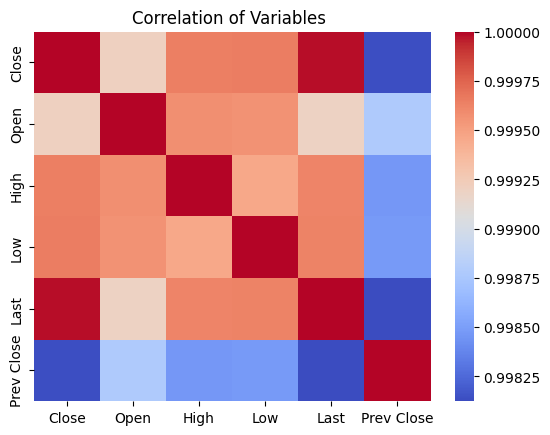

In [10]:
sns.heatmap(cor_matrix , cmap = 'coolwarm' , annot = False)
plt.title('Correlation of Variables ')

From this correlation analysis we can find that the every independent variable is having a high correlatiion with the dependent variable.

Checking the relationship of each variable with Dependent variable

Text(0.5, 1.0, 'Relationship of Closing and Opening price')

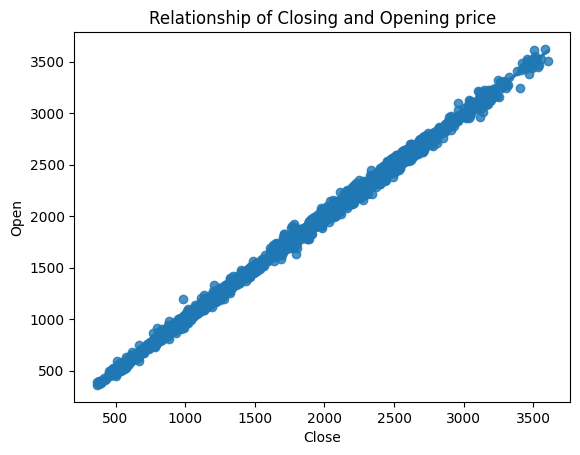

In [11]:
sns.regplot(x = df[['Close']], y = df[['Open']], data= df)
plt.title("Relationship of Closing and Opening price")

Text(0.5, 1.0, 'Relationship of Closing and High price')

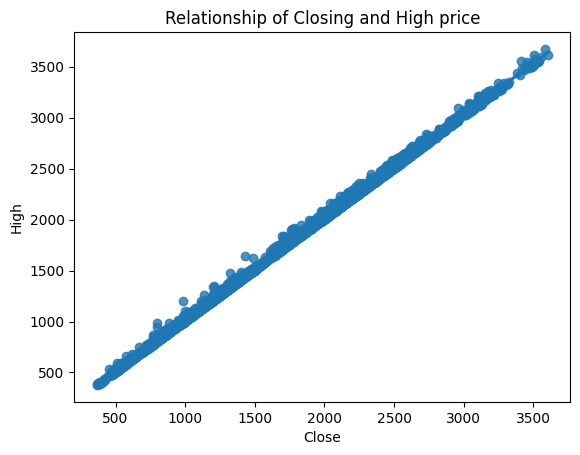

In [12]:
sns.regplot(x = df[['Close']], y = df[['High']], data= df)
plt.title("Relationship of Closing and High price")

Text(0.5, 1.0, 'Relationship of Closing and Low price')

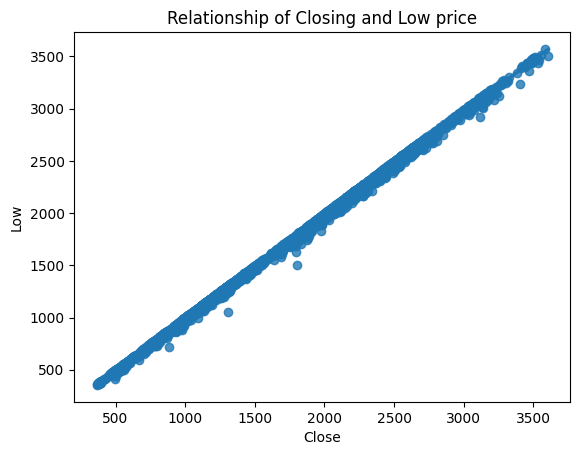

In [13]:
sns.regplot(x = df[['Close']], y = df[['Low']], data= df)
plt.title("Relationship of Closing and Low price")

Text(0.5, 1.0, 'Relationship of Closing and Last price')

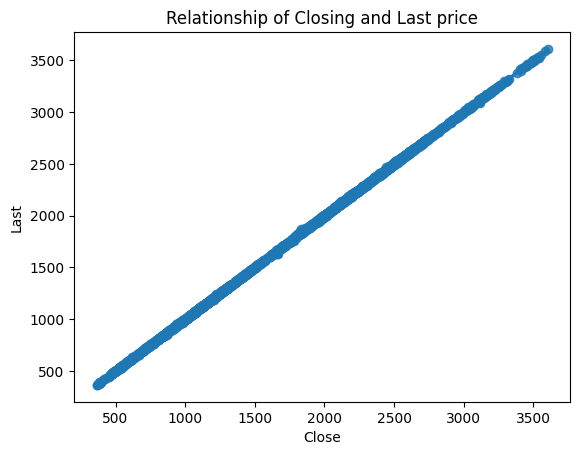

In [14]:
sns.regplot(x = df[['Close']], y = df[['Last']], data= df)
plt.title("Relationship of Closing and Last price")

Text(0.5, 1.0, 'Relationship of Closing and Previouse close price')

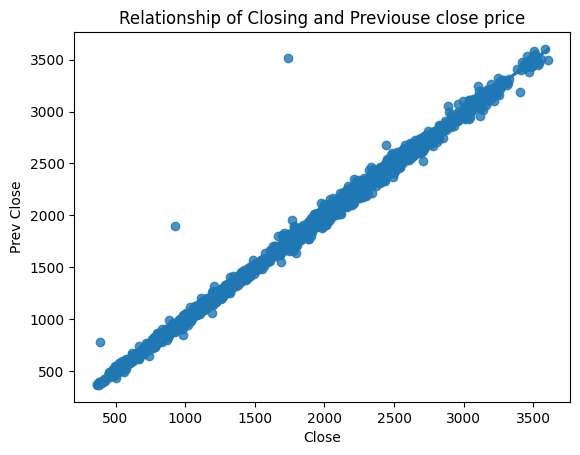

In [15]:
sns.regplot(x = df[['Close']], y = df[['Prev Close']], data= df)
plt.title("Relationship of Closing and Previouse close price")

Each independent variable has a positve realtionship with the dependent variable, and Previous closing price have some outliers.

Alloting the Dependent and Independent Variable

In [16]:
y = df[['Close']]
x = df[['Open','High','Low','Last','Prev Close']]

Spiliting the Dependent and Independet Variables in Training and Testings values

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state  = 0)

In [19]:
#dimentions of training models
x_train.shape

(2897, 5)

In [20]:
#dimentions of testing models
x_test.shape

(1242, 5)

Training the **model**

In [21]:
lm = LinearRegression()
lm.fit(x_train,y_train)

print('Intercept: ' ,  lm.intercept_)
print('coefficient : ' ,  lm.coef_)

Intercept:  [0.4633596]
coefficient :  [[-0.06695249  0.10075534  0.09384975  0.8748669  -0.0028351 ]]


From this Regression anaalysis we can see that two variables are negatively related while training the model that are Previous close price and open price.

MODEL
Close = 0.4633596 - (0.06695249 Open) + (0.10075534 High) + (0.09384975 Low) + (0.8748669 Last) - (0.0028351 * Perv Close)**bold text**

In [22]:
#Predicting the model
yhat = lm.predict(x_test)

print(yhat)

[[ 847.70837503]
 [2676.71767979]
 [1164.74143655]
 ...
 [2503.43377164]
 [1743.64362   ]
 [ 745.89202508]]


In [23]:
print({'Actual': y_test, 'Predicted': yhat})

{'Actual':         Close
958    844.40
2613  2675.25
45    1165.95
3145  2310.35
3994  2488.40
...       ...
1957  1247.85
1513   927.60
3112  2499.80
3418  1741.05
1358   746.15

[1242 rows x 1 columns], 'Predicted': array([[ 847.70837503],
       [2676.71767979],
       [1164.74143655],
       ...,
       [2503.43377164],
       [1743.64362   ],
       [ 745.89202508]])}


<Axes: ylabel='Density'>

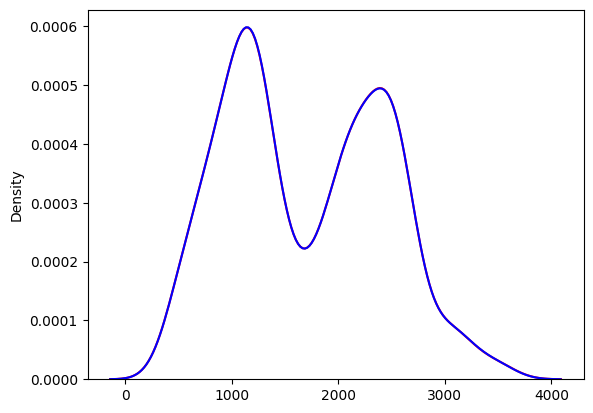

In [24]:
axl = sns.distplot(y_test, hist = False , color  = 'r')

sns.distplot(yhat, hist = False , color = 'b', ax = axl)

In comparing the predicted values with actual values, the values are same. let's justify by evaluating the model.

Model **Evaluation**

In [25]:
mean_squared_error(y_test, yhat )

16.032826179874565

In [26]:
rsqr = lm.score(x,y)

print('R - Squared :' , rsqr)

R - Squared : 0.999967357434323


From the above two model evaluation matrix we can find that the goodness of fit is 0.9999 which explians that the independent variable explians the 99.99% of the dependent variable and The average error between the predictions and actuals in this dataset is 16.03, which is likely a good value considering the average closing price is 1694.

Text(0.5, 0, 'yhat')

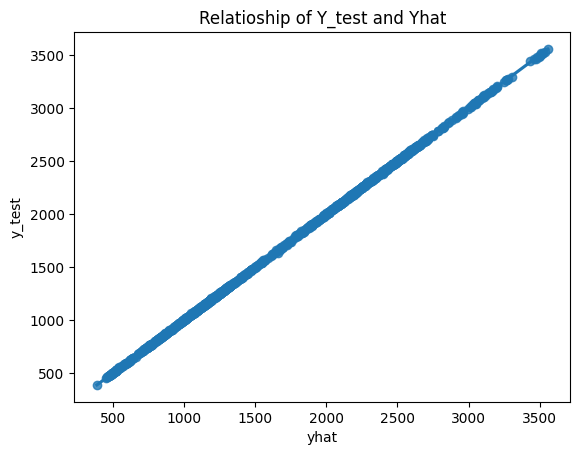

In [27]:
sns.regplot( x = y_test, y = yhat , data = df)
plt.title('Relatioship of Y_test and Yhat')
plt.ylabel('y_test')
plt.xlabel('yhat')

ANALYSING WITH THE MODEL

We will take some relevant unseen values of independent variable to prideict the dependent variable closing price.

1: Open : 3326
2: High : 3335
3: Low : 3302
4: Last : 3308
5: Prev Close : 3324

In [28]:
values = [[3326,3335,3302,3308,3324]]

closep = lm.predict(values)

print('Closing Price :', closep)

Closing Price : [[3308.32614286]]


If the Open price is 3326, High price is 3335 , Low price is 3302 , Last price is 3308 and Prev Close price is 3324 the closing price will be 3308.

CONCLUSION

According to the descriptive statistics, the closing price will be 1694 Rs. while the opening price is 1625, the high price is 1655, the low price is 1610, the last price was 1630, and the previous closure was 1633. Each independent variable and the dependent variable have high correlations according to the correlation analysis, which suggests a favourable association. There are some anomalies in the prior closing price, though. The model's open price and preceding closing price have a negative association, according to the regression analysis.

Close = 0.4633596 - (0.06695249 Open) + (0.10075534 High) + (0.09384975 Low) + (0.8748669 Last) - (0.0028351 * Prev Close) is the formula for the model.

The expected values and actual values are very similar. The dependent variable is explained by the independent variables in 99.99% of the cases when the goodness of fit is 0.9999. Given the average closing price of 1694, the average difference between projections and actuals is 16.03, which is fair. Therefore this Machine learning Model is Valid.